In [37]:
import pandas as pd
df = pd.read_csv("trazas_finales.csv", delimiter=',')

In [38]:
level_filtered = df[df['EventName'].str.contains('StartLevelEvent')]

levels_completed = len(level_filtered)

In [39]:
from collections import defaultdict

IDs_levels = defaultdict(list)
current_id = ''
for ind in level_filtered.index:
    a = str(level_filtered['Idpruebas'][ind])
    if a not in current_id:
        current_id = a
        IDs_levels[current_id] = 0
        
    IDs_levels[current_id] += 1 

In [40]:
sin_dda = []
con_dda = []
for i in IDs_levels:
    if int(i)%2 == 0:
        con_dda.append(IDs_levels[i])
    else:
        sin_dda.append(IDs_levels[i])


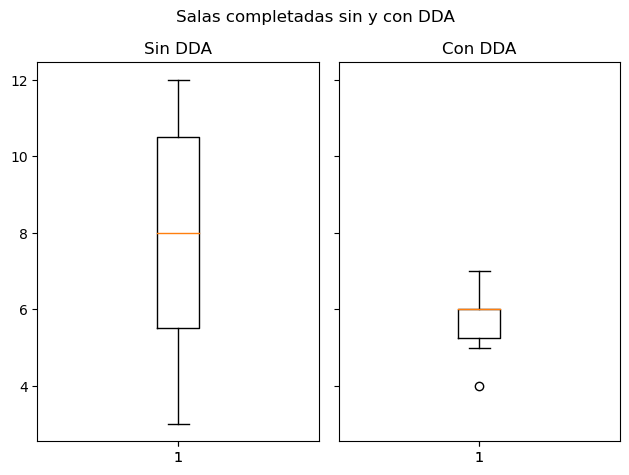

In [41]:
import matplotlib.pyplot as plt
import numpy as np

f, axs = plt.subplots(1, 2, sharey=True, sharex=True)
axs[0].boxplot(sin_dda)
axs[0].set_title("Sin DDA")

axs[1].boxplot(con_dda)
axs[1].set_title("Con DDA")

plt.tight_layout()

f.suptitle("Salas completadas sin y con DDA")
f.subplots_adjust(top=0.87)

plt.savefig("Resultados/Diferencias_DDA.pdf", format="pdf", bbox_inches="tight")

plt.show()